In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

import torch
import torch.nn.functional as F

%matplotlib inline
pd.set_option('display.max_columns', None)

from model0 import BiGram as BiGram0
from model1 import BiGram as BiGram1

## BiGram 0


In [2]:
words = open("../../data/names.txt", "r").read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [3]:
m = BiGram0()
m.train(words)

tensor(2.5139)

In [4]:
m.generate(10)

['mahte.',
 'd.',
 'h.',
 'n.',
 'arccumobr.',
 'has.',
 'suj.',
 'delenas.',
 'ah.',
 'marothron.']

## BiGram 1


In [5]:
chars = sorted(set("".join(words)))
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi["."] = 0
itos = {i: s for s, i in stoi.items()}


def preprocess(words: list[str], n_vocab=27):
    xs, ys = [], []

    for w in words[:]:
        chs = ["."] + list(w) + ["."]
        for c1, c2 in zip(chs, chs[1:]):
            ix1 = stoi[c1]
            ix2 = stoi[c2]
            xs.append(ix1)
            ys.append(ix2)

    xs = torch.tensor(xs)
    ys = torch.tensor(ys)

    xenc = F.one_hot(xs, num_classes=n_vocab).float()
    return xenc, ys


xenc, ys = preprocess(words)
xenc.shape, ys.shape

(torch.Size([228146, 27]), torch.Size([228146]))

In [6]:
def generate(n=10):
    for _ in range(n):
        out = []
        ix = 0
        while True:
            xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
            p = m.forward(xenc)
            ix = torch.multinomial(p, num_samples=1, replacement=True).item()
            out.append(itos[ix])
            if ix == 0:
                break
        print("".join(out))

In [13]:
n_samples = len(xenc)
m = BiGram1()
losses = []

In [14]:
generate(3)

kldjvpv.
kznkf.
jxxrpnnrzd.


In [15]:
n_iters = 200
lr = 50
λ = 0.01

In [16]:
for k in range(n_iters):
    probs = m.forward(xenc)
    loss = -probs[torch.arange(n_samples), ys].log().mean() + λ * (m.W**2).mean()
    losses.append(loss.item())
    if k % 100 == 0:
        print(loss.item())
    m.W.grad = None

    loss.backward()
    m.W.data += -lr * m.W.grad
print(loss.item())

3.744225025177002
2.490281581878662
2.4830780029296875


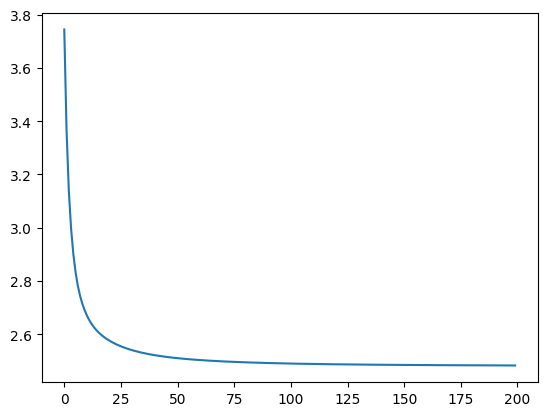

In [17]:
plt.plot(range(len(losses)), losses)

In [25]:
generate()

jan.
zabreyamca.
kariahyoslneelin.
jed.
aenomama.
tee.
m.
briv.
kerri.
ce.
